# <span style="color:red"> Assignment - 1   Question - 7 </span> 

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

## Part 1

In [2]:
def piecewiseLinTransform(im,K1,K2,a,b):
    x1= K1*im+K2
    img_tranform=[(im >= a) & (im <= b)] *x1 + [(im < a) | (im > b)] *im
    return img_tranform[0].astype(np.uint8)

## Part 2

In [15]:
b1_img=cv.imread('../images/bondvillain1.jpg',0) #Reading in gray scale with argument as 1

76.0 153.0 204.0
(1500, 1013)


Text(0.5, 1.0, 'Original b1_villain1 image')

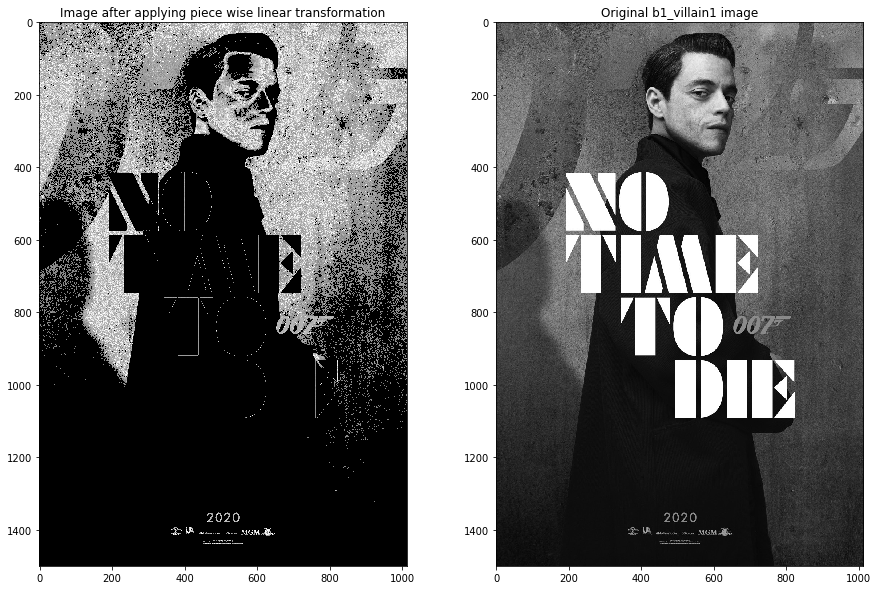

In [16]:
r1=np.round(0.3*255)
r2=np.round(0.6*255)
r3=np.round(0.8*255)
print(r1,r2,r3)
print(b1_img.shape)

img1=piecewiseLinTransform(b1_img,0,0,0,r1)
img1=piecewiseLinTransform(img1,1.324,1.324,r1,r2)
img1=piecewiseLinTransform(img1,-2,510,r2,r3)
img1=piecewiseLinTransform(img1,0,0,r3+1,255)

f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img1,cmap="gray")
axarr[1].imshow(b1_img,cmap="gray")
axarr[0].set_title("Image after applying piece wise linear transformation")
axarr[1].set_title("Original b1_villain1 image")

51.0 102.0 153.0 204.0
(1500, 1013)


Text(0.5, 1.0, 'Original b2_villain2 image')

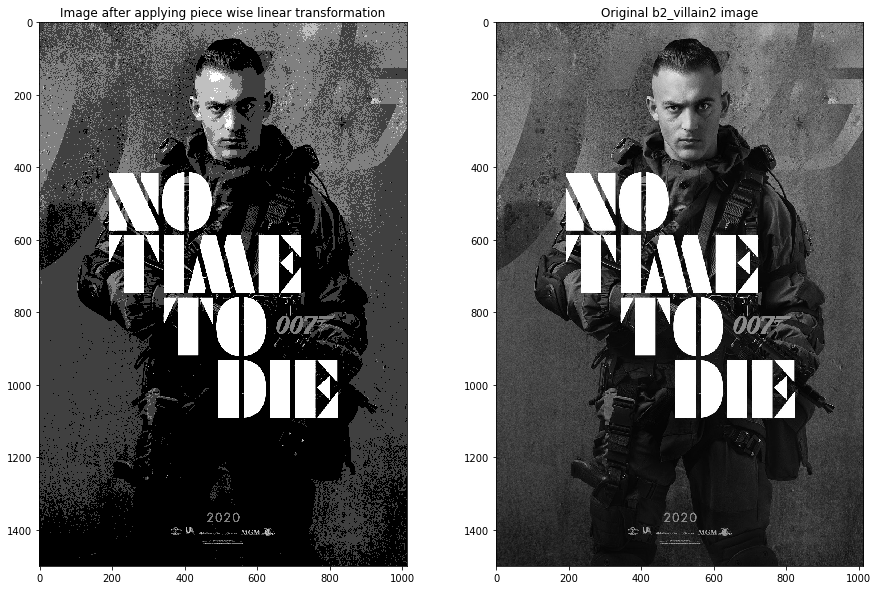

In [17]:
b2_img=cv.imread('../images/bondvillain2.jpg',0) #Reading in gray scale with argument as 0
r1=np.round(0.2*255)
r2=np.round(0.4*255)
r3=np.round(0.6*255)
r4=np.round(0.8*255)
print(r1,r2,r3,r4)
print(b2_img.shape)

img2=piecewiseLinTransform(b2_img,0,0,0,r1)
img2=piecewiseLinTransform(img2,0,51,r1,r2)
img2=piecewiseLinTransform(img2,0,102,r2,r3)
img2=piecewiseLinTransform(img2,0,153,r3,r4)
img2=piecewiseLinTransform(img2,0,204,r4,255)
img2=piecewiseLinTransform(img2,0,255,255,255)

f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img2,cmap="gray")
axarr[1].imshow(b2_img,cmap="gray")
axarr[0].set_title("Image after applying piece wise linear transformation")
axarr[1].set_title("Original b2_villain2 image")

## Part 3

Text(0.5, 1.0, 'Custom piecewise linear function(Scaled to 255 on x and y axis)')

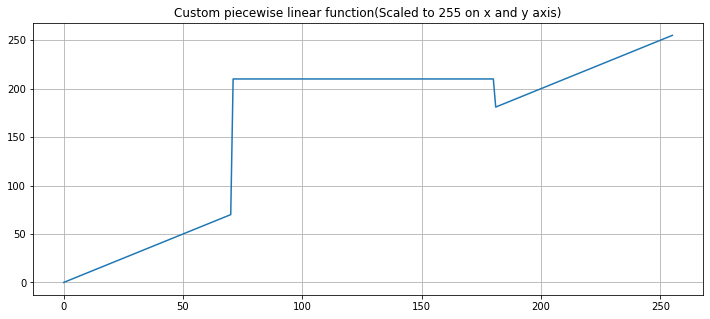

In [25]:
inp_inten=np.arange(0,256)
medium=np.full((1,256),210)
res_inten=[(inp_inten>=0) & (inp_inten<= 70)]*inp_inten +[(inp_inten>70) & (inp_inten<=180)]*medium + [(inp_inten>180) & (inp_inten<=255)]*inp_inten
plt.figure(figsize = (12,5))
plt.plot(inp_inten,res_inten[0])
plt.grid()
plt.axis()
plt.title("Custom piecewise linear function(Scaled to 255 on x and y axis)")

In [19]:
img_check= cv.imread('../images/b_app.jpg',0)

Text(0.5, 1.0, 'Original Black Apple Image')

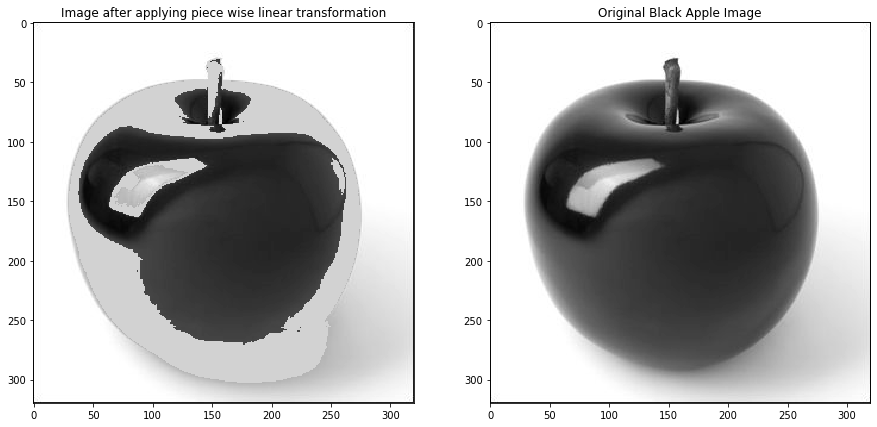

In [20]:
img3=piecewiseLinTransform(img_check,1,0,0,70)
img3=piecewiseLinTransform(img3,0,210,71,180)
img3=piecewiseLinTransform(img3,1,0,181,255)

f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img3,cmap="gray")
axarr[1].imshow(img_check,cmap="gray")
axarr[0].set_title("Image after applying piece wise linear transformation")
axarr[1].set_title("Original Black Apple Image")

<span style="color:blue ; font-size:18px"> Do you notice any difference in the piecewise linear transforms of the two images, especially in the text overlay?</span>
<br> In both the figures villain1 and villain2 the text is written with color white which is >235 intensity. 
<br>
-  In the **first piece wise transformation**, the intensities > 204 are cut and made to 0 (that is black). Hence the text changed its color to black. As background is also little blackish, the text is not visible clearly as compared to original. And intensities upto 76 are cutoff and made it to 0, hence some greyish portions of image are turned to pure black, and resembles like pepper noise.
<br>
<br>
- In the **second piece wise transformation**, white intensities(200 and above) are not cut and they remain still with good amplitude, hence text is clearly visible. And its also important to note that intensities upto 51 are cut, hence some greyish portions of image are turned to pure black, hence it resembles like pepper noise.